https://colab.research.google.com/drive/11c8WKwqd7MCHaFuSpTys6bjaPm7zOQ6q?usp=sharing

In [ ]:
%matplotlib inline
!pip install -U fortran-magic
%load_ext fortranmagic
%reload_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>





**My own example K**



In [ ]:
# Suppose we have some matrices...
a1 = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7]]

b1 = [[1, 2, 3],
     [2, 3, 4],
      [2, 2, 2]]


**My own example K+1**

In [ ]:
# Suppose we have some matrices...
a2 = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
      [1,2,3],
      [5,5,5]]

b2 = [[1, 2, 3,2,3],
     [2, 3, 4,1,4]]

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 46 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [ ]:
%%time

matmul(a1, b1)

CPU times: user 31 µs, sys: 5 µs, total: 36 µs
Wall time: 39.6 µs


[[11, 14, 17], [16, 21, 26], [31, 42, 53]]

In [ ]:
%%time

matmul(a2, b2)


CPU times: user 47 µs, sys: 0 ns, total: 47 µs
Wall time: 52 µs


[[5, 8, 11, 4, 11],
 [8, 13, 18, 7, 18],
 [17, 28, 39, 16, 39],
 [5, 8, 11, 4, 11],
 [15, 25, 35, 15, 35]]

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

matmul(a, b)

[[5, 8, 11], [8, 13, 18], [17, 28, 39], [3, 5, 7]]

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
def matmulE(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B)
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out



def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

matmul(a, b)
matmulE(a, b)


[[5, 8], [8, 13], [17, 28], [3, 5]]

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmulE(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B)
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

lenB = matmulE(a, b)

def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

lenA = matmul(a, b)

if lenB==lenA:
  print("len(A[0]) == len(B)")
else:
  print("len(A[0]) =/= len(B)")

len(A[0]) =/= len(B)


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmulE(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B)
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

lenB = matmulE(a1, b1)

def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

lenA = matmul(a2, b2)

if lenB==lenA:
  print("len(A[0]) == len(B)")
else:
  print("len(A[0]) =/= len(B)")

len(A[0]) =/= len(B)


**My own example 5 - Deifining A and B that are compatiible for multiplcation**

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

def matmulV(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    q = len(A[0])
    t = len(B)
    if(q!=t):
      print("Error! Matrix sizes are not compatible")
      A==False

    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if A == True:
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      quit()

def compatible(A,B):
  # retrieving the sizes/dimensions of the matrices
  p = len(A)
  q = len(A[0])
  
  t = len(B)
  r = len(B[0])
  if(q!=t):
   print("Error! Matrix sizes are not compatible")
   quit()

matmulV(a,b)

Error! Matrix sizes are not compatible


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
# Suppose we have some matrices...
a1 = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7]]

b1 = [[1, 2, 3],
     [2, 3, 4],
      [2, 2, 2]]

def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    q = len(A[0])
    t = len(B)
    if(q!=t):
      print("Error! Matrix sizes are not compatible")


    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out


matmul(a1,b1)

[[11, 14, 17], [16, 21, 26], [31, 42, 53]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9935633480134638, 0.2011681933055579, 0.8366423316624224],
 [0.1290906407329494, 0.3356928954299402, 0.3045174661485974]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
%%time
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

for i in range(10):
  randa = random_matrix(600, 100)
  randb = random_matrix(100, 600)
  matmul(randa,randb)



CPU times: user 1min 18s, sys: 159 ms, total: 1min 18s
Wall time: 1min 19s


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
from datetime import datetime

now = datetime.now()

#dataframe


time_execution = datetime.now() -now
print(time_execution)

**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
%%time
import numpy as np
import random

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

for i in range(10):
  randa = random_matrix(600, 100)
  randb = random_matrix(100, 600)
  res = np.dot(randa,randb)
  print(res)

[[22.68720677 24.36195894 26.48141803 ... 23.98488679 23.13655882
  23.78671604]
 [24.43747215 26.18862706 27.63047744 ... 26.23635169 27.58231113
  26.82361947]
 [22.04193063 23.31665025 25.62235417 ... 23.6751817  22.64490779
  24.85280691]
 ...
 [25.51233719 27.57455243 28.83105717 ... 28.74163225 25.95220198
  25.53574763]
 [25.25672707 25.43332132 28.15909427 ... 28.50132039 26.80856294
  28.1102798 ]
 [23.01716051 23.93209456 26.77923943 ... 24.47737476 25.00506455
  23.90482035]]
[[22.21231314 23.04550331 24.72149026 ... 25.46539443 24.16721672
  23.82541472]
 [24.33433475 23.43835012 22.83002092 ... 26.12280079 24.27843856
  22.5097992 ]
 [25.17885894 26.2354329  26.35535265 ... 27.52066918 26.37097757
  26.2720824 ]
 ...
 [26.46311721 27.77792343 25.4460045  ... 28.77732263 28.26572606
  25.14194102]
 [21.97250005 23.38554893 24.19700782 ... 25.49900903 24.02928732
  24.13666438]
 [22.47259292 22.0974884  23.84858051 ... 26.07203243 25.03231645
  22.4638316 ]]
[[21.70971053 27

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 8.6 s, sys: 25 ms, total: 8.63 s
Wall time: 8.64 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 17.7 ms, sys: 0 ns, total: 17.7 ms
Wall time: 37 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 181 µs, sys: 1 µs, total: 182 µs
Wall time: 190 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
mat1 = ([1, 6, 5],[3 ,4, 8])
mat2 = ([3, 4, 6],[5, 6, 7])

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
fortran_dot_product(mat1, mat2)

152.0

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
fortran_dot_product(mat1, mat2)

152.0

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
fortran_dot_product(randa, randb)

14973.273718173528

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
fortran_dot_product(randa, randb)

15126.032890483026

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
%%time
for i in range(10):
  randa = random_matrix(600, 100)
  randb = random_matrix(100, 600)
  res = fortran_dot_product(randa,randb)
  print(res)


14955.280387104996
15078.207467947734
15044.126240855716
14923.224255177744
15023.248257500061
15036.777247240812
15033.366323153958
14951.856221310005
14926.49571437622
15004.858951086182
CPU times: user 425 ms, sys: 7.96 ms, total: 433 ms
Wall time: 502 ms


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
def tentimes(A,B):
  for i in range(10):
    print(fortran_dot_product(randa,randb))

randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
tentimes(randa,randb)

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
def tentimes(A,B):
  for i in range(10):
    print(fortran_dot_product(randa,randb))

randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
tentimes(randa,randb)

15012.802581607135
15012.802581607135
15012.802581607135
15012.802581607135
15012.802581607135
15012.802581607135
15012.802581607135
15012.802581607135
15012.802581607135
15012.802581607135


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
%%time
def tentimes(A,B):
  for i in range(10):
    print(fortran_dot_product(randa,randb))

randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
tentimes(randa,randb)

14905.298700178102
14905.298700178102
14905.298700178102
14905.298700178102
14905.298700178102
14905.298700178102
14905.298700178102
14905.298700178102
14905.298700178102
14905.298700178102
CPU times: user 169 ms, sys: 1.99 ms, total: 171 ms
Wall time: 179 ms


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
#Mul of matrices  c example
%%writefile multma.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>       // for clock_t, clock(), CLOCKS_PER_SEC
#include <unistd.h>     // for sleep()

int main()
{
    int f1, c1, c2, f2;
    f1 = 600;
    c1 = 100;
    f2 = 100;
    c2 = 100; 
    int matriz_a[f1][c1];
    int matriz_b[c2][f2];
    int mul[f1][c2];
    int i, o, x, y, j;
    clock_t start_t, end_t;
    double total_t;

   for(int p = 0; p  < 10; p++){

        for(o = 0; o<f1; o++)
            for(i = 0; i<c1; i++)
                matriz_a[o][i] = rand();

        for(x = 0; x<f2; x++)
            for(y = 0; y<c2; y++)
                matriz_b[x][y] = rand();

        if(c1 != f2){
            return 0;
        }




    //========================== 
    start_t = clock(); 
    //=========================== 

        for(i=0;i<f1;i++)    
        {    
            for(j=0;j<c1;j++)    
                {    
                    mul[i][j]=0;    
                    for(x=0;x<f2;x++)    
                    {    
                        mul[i][j]+=matriz_a[i][x]*matriz_b[x][j];    
                    }    
                }    
        }

    //==============================================
    end_t = clock();  
    //==============================================

    total_t = ((double)(end_t - start_t) / CLOCKS_PER_SEC)*1000;
    printf("Total time taken by CPU %d attempt: %f miliseconds\n", p ,total_t );

   }

   printf("Time took it for total function");


    return 0;
}

Writing multma.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
!g++ multma.c -o matrix_mul
!./matrix_mul

Total time taken by CPU 0 attempt: 31.048000 miliseconds
Total time taken by CPU 1 attempt: 28.855000 miliseconds
Total time taken by CPU 2 attempt: 28.732000 miliseconds
Total time taken by CPU 3 attempt: 31.361000 miliseconds
Total time taken by CPU 4 attempt: 28.611000 miliseconds
Total time taken by CPU 5 attempt: 29.906000 miliseconds
Total time taken by CPU 6 attempt: 29.092000 miliseconds
Total time taken by CPU 7 attempt: 31.028000 miliseconds
Total time taken by CPU 8 attempt: 32.499000 miliseconds
Total time taken by CPU 9 attempt: 31.927000 miliseconds
Time took it for total functionCPU times: user 20.3 ms, sys: 18 ms, total: 38.4 ms
Wall time: 845 ms


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
%%time
!g++ multma.c -o matrix_mul
!./matrix_mul

Total time taken by CPU 0 attempt: 29.999000 miliseconds
Total time taken by CPU 1 attempt: 33.138000 miliseconds
Total time taken by CPU 2 attempt: 32.991000 miliseconds
Total time taken by CPU 3 attempt: 28.697000 miliseconds
Total time taken by CPU 4 attempt: 31.627000 miliseconds
Total time taken by CPU 5 attempt: 29.035000 miliseconds
Total time taken by CPU 6 attempt: 28.583000 miliseconds
Total time taken by CPU 7 attempt: 30.559000 miliseconds
Total time taken by CPU 8 attempt: 28.685000 miliseconds
Total time taken by CPU 9 attempt: 36.771000 miliseconds
Time took it for total functionCPU times: user 22.4 ms, sys: 18 ms, total: 40.5 ms
Wall time: 674 ms


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile multma.java

import java.util.Random;

class Main {

  public static void main(String[] args) {
    
    Random r = new Random();
    int f1,c1,f2,c2;
    f1 = 600;
    c1 = 100;
    f2 = 100; 
    c2 = 100; 

    for(int p = 0; p < 3; p ++ ){

        int[][] a =new int[f1][c1];
        int[][] b = new int[f2][c2];
        int[][] mul = new int [f1][c2];

        //matrix_a generation

        for(int i=0;i<f1;i++)
        {
        for(int j=0;j<c1;j++)
        {
            a[i][j]=r.nextInt(100);
            //System.out.print(a[i][j]+"\t");
        }
        //System.out.print("\n");
        }


        //matrix_b generation

        for(int x=0;x<f2;x++)
        {
        for(int y=0;y<c2;y++)
        {
            b[x][y]=r.nextInt(100);
            //System.out.print(b[x][y]+"\t");
        }
        //System.out.print("\n");
        }

        if(c1 != f2){
            return;
        }


        //MULTIPLICATION 

        long startTime = System.nanoTime();

        for(int i=0;i<f1;i++)    
            {    
                for(int j=0;j<c1;j++)    
                    {    
                        mul[i][j]=0;    
                        for(int x=0;x<f2;x++)    
                        {    
                            mul[i][j]+=a[i][x]*b[x][j];    
                        }    
                    }    
            }

        long endTime = System.nanoTime();


        long duration = (endTime - startTime)/1000000; 
        System.out.println("Tiempo "+ p + ": " + duration + " milisegundos.");

    }
  }
}

Overwriting multma.java


In [ ]:
!javac multma.java
!java multma

In [19]:
#Executing js
%%writefile matmul.js

const { performance } = require('perf_hooks');

function getRandomInt(max) {
  return Math.floor(Math.random() * max);
}

function matriz_gen(f,c){
    var matriz = new Array(f);
    for (var i = 0; i < matriz.length; i++) {
        matriz[i] = new Array(c);
}   
 
    for (var i = 0; i < f; i++) {
        for (var j = 0; j < c; j++) {
         matriz[i][j] = getRandomInt(100);
        }
    }

    return matriz;
}

var f1 = 600;
var c1 = 100;
var f2 = 100;
var c2 = 100; 

for( var p = 0; p < 10; p ++){
    var matriz_a = matriz_gen(f1,c1);
    var matriz_b = matriz_gen(f2,c2);
    var mul = matriz_gen(f1,c2);

    if( c1 !== f2){
        return 0; 
    }


    var startTime = performance.now()
    //multiplication
        for(var i=0; i < f1;i++)    
                {    
                    for(var j=0; j < c1; j++)    
                        {    
                            mul[i][j]=0;    
                            for(var x=0;x<f2;x++)    
                            {    
                                mul[i][j]+=matriz_a[i][x]*matriz_b[x][j];    
                            }    
                        }    
                }
    var endTime = performance.now();
    console.log(`The multiplication number ${p} took  ${endTime - startTime} milliseconds`);

}


Writing matmul.js


In [16]:
#samples
"""Python
---attempt 0 : 1244.3795204162598 miliseconds ---
---attempt 1 : 1220.9181785583496 miliseconds ---
---attempt 2 : 1229.6092510223389 miliseconds ---
---attempt 3 : 1232.513427734375 miliseconds ---
---attempt 4 : 1220.3011512756348 miliseconds ---
---attempt 5 : 1238.5337352752686 miliseconds ---
---attempt 6 : 1239.356279373169 miliseconds ---
---attempt 7 : 1246.0458278656006 miliseconds ---
---attempt 8 : 1224.6828079223633 miliseconds ---
---attempt 9 : 1234.9169254302979 miliseconds ---
"""

"""C
    Total time taken by CPU 0 attempt: 28.977000 miliseconds
    Total time taken by CPU 1 attempt: 27.991000 miliseconds
    Total time taken by CPU 2 attempt: 27.784000 miliseconds
    Total time taken by CPU 3 attempt: 31.053000 miliseconds
    Total time taken by CPU 4 attempt: 27.759000 miliseconds
    Total time taken by CPU 5 attempt: 27.799000 miliseconds
    Total time taken by CPU 6 attempt: 28.577000 miliseconds
    Total time taken by CPU 7 attempt: 28.820000 miliseconds
    Total time taken by CPU 8 attempt: 28.702000 miliseconds
    Total time taken by CPU 9 attempt: 27.803000 miliseconds
"""

"""C++
    Total time taken by CPU 0 attempt: 28.418000 miliseconds
    Total time taken by CPU 1 attempt: 29.017000 miliseconds
    Total time taken by CPU 2 attempt: 28.608000 miliseconds
    Total time taken by CPU 3 attempt: 32.458000 miliseconds
    Total time taken by CPU 4 attempt: 28.195000 miliseconds
    Total time taken by CPU 5 attempt: 28.902000 miliseconds
    Total time taken by CPU 6 attempt: 28.536000 miliseconds
    Total time taken by CPU 7 attempt: 28.172000 miliseconds
    Total time taken by CPU 8 attempt: 28.754000 miliseconds
    Total time taken by CPU 9 attempt: 30.983000 miliseconds
"""

""" Java (take 3 by 3)
    El tiempo total de la multiplicación es del intento 0: 27 milisegundos.
    El tiempo total de la multiplicación es del intento 1: 55 milisegundos.
    El tiempo total de la multiplicación es del intento 2: 14 milisegundos.
    El tiempo total de la multiplicación es del intento 0: 33 milisegundos.
    El tiempo total de la multiplicación es del intento 1: 38 milisegundos.
    El tiempo total de la multiplicación es del intento 2: 72 milisegundos.
    El tiempo total de la multiplicación es del intento 0: 31 milisegundos.
    El tiempo total de la multiplicación es del intento 1: 45 milisegundos.
    El tiempo total de la multiplicación es del intento 2: 73 milisegundos.
    El tiempo total de la multiplicación es del intento 0: 28 milisegundos.
"""

""" Javascript
    The multiplication number 0 took  48.039186999201775 milliseconds
    The multiplication number 1 took  76.79457999952137 milliseconds
    The multiplication number 2 took  44.21608999930322 milliseconds
    The multiplication number 3 took  45.05909899994731 milliseconds
    The multiplication number 4 took  44.55920500122011 milliseconds
    The multiplication number 5 took  43.881548000499606 milliseconds
    The multiplication number 6 took  46.65116100013256 milliseconds
    The multiplication number 7 took  44.184397999197245 milliseconds
    The multiplication number 8 took  44.27610400132835 milliseconds
    The multiplication number 9 took  44.24002099968493 milliseconds
"""

""" Numpy
    ---attempt 0 : 0.7097721099853516 miliseconds ---
    ---attempt 1 : 0.7321834564208984 miliseconds ---
    ---attempt 2 : 0.6299018859863281 miliseconds ---
    ---attempt 3 : 0.6287097930908203 miliseconds ---
    ---attempt 4 : 0.6291866302490234 miliseconds ---
    ---attempt 5 : 0.6954669952392578 miliseconds ---
    ---attempt 6 : 0.6644725799560547 miliseconds ---
    ---attempt 7 : 0.6334781646728516 miliseconds ---
    ---attempt 8 : 0.6244182586669922 miliseconds ---
    ---attempt 9 : 0.6978511810302734 miliseconds ---
"""

' Numpy\n    ---attempt 0 : 0.7097721099853516 miliseconds ---\n    ---attempt 1 : 0.7321834564208984 miliseconds ---\n    ---attempt 2 : 0.6299018859863281 miliseconds ---\n    ---attempt 3 : 0.6287097930908203 miliseconds ---\n    ---attempt 4 : 0.6291866302490234 miliseconds ---\n    ---attempt 5 : 0.6954669952392578 miliseconds ---\n    ---attempt 6 : 0.6644725799560547 miliseconds ---\n    ---attempt 7 : 0.6334781646728516 miliseconds ---\n    ---attempt 8 : 0.6244182586669922 miliseconds ---\n    ---attempt 9 : 0.6978511810302734 miliseconds ---\n'

In [17]:
# import pandas as pd
import pandas as pd 

print("Time arrays (ms)")
lst = [[1244.379, 28.977, 28.418, 27.000, 48.391, 0.709],
       [1220.918,  27.991, 29.017, 55.000, 76.794, 0.732 ],
       [1229.609, 27.784, 28.608,  14.000, 44.216,  0.629 ],
       [1232.513, 31.053, 32.458, 33.000 ,45.059, 0.628 ],
       [1220.301, 27.759, 28.195, 38.000 , 44.559, 0.629 ],
       [1238.533, 27.799, 28.902, 72.000 , 43.881, 0.695 ],
       [1239.356, 28.577, 28.536, 31.000 , 46.651, 0.664 ],
       [1246.045,28.820,  28.172, 45.000 , 44.184, 0.633],
       [1224.682,28.702, 28.754, 73.000 , 44.276,  0.624 ],
       [1234.916, 27.803, 30.983, 28.000 , 44.240, 0.697]]
    
times = pd.DataFrame(lst, columns =['Python', 'C', 'C++', 'Java', 'Javascript', 'Numpy'])
print(times)

Time arrays (ms)
     Python       C     C++  Java  Javascript  Numpy
0  1244.379  28.977  28.418  27.0      48.391  0.709
1  1220.918  27.991  29.017  55.0      76.794  0.732
2  1229.609  27.784  28.608  14.0      44.216  0.629
3  1232.513  31.053  32.458  33.0      45.059  0.628
4  1220.301  27.759  28.195  38.0      44.559  0.629
5  1238.533  27.799  28.902  72.0      43.881  0.695
6  1239.356  28.577  28.536  31.0      46.651  0.664
7  1246.045  28.820  28.172  45.0      44.184  0.633
8  1224.682  28.702  28.754  73.0      44.276  0.624
9  1234.916  27.803  30.983  28.0      44.240  0.697


In [18]:
times[['Python', 'C', 'C++', 'Java', 'Javascript', 'Numpy']].mean()

Python        1233.1252
C               28.5265
C++             29.2043
Java            41.6000
Javascript      48.2251
Numpy            0.6640
dtype: float64

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements  

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

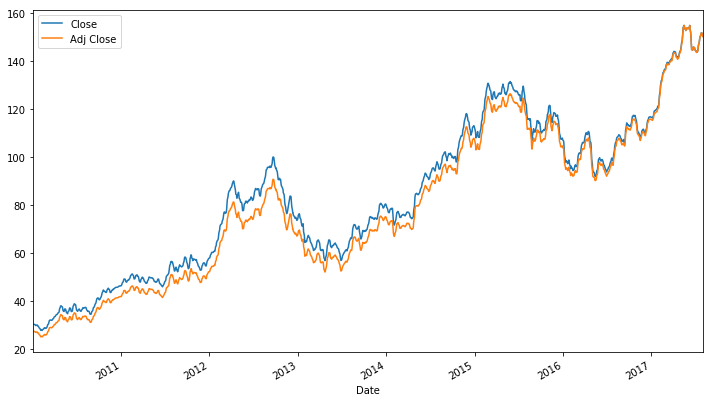

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

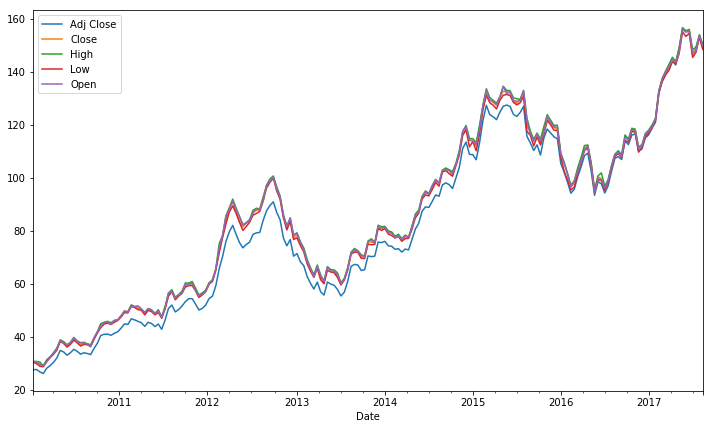

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

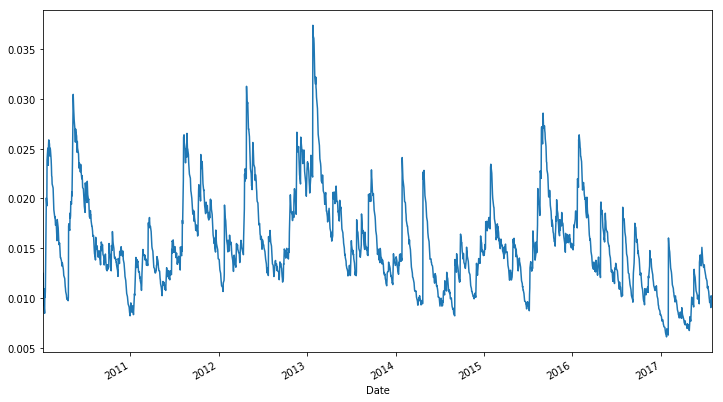

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

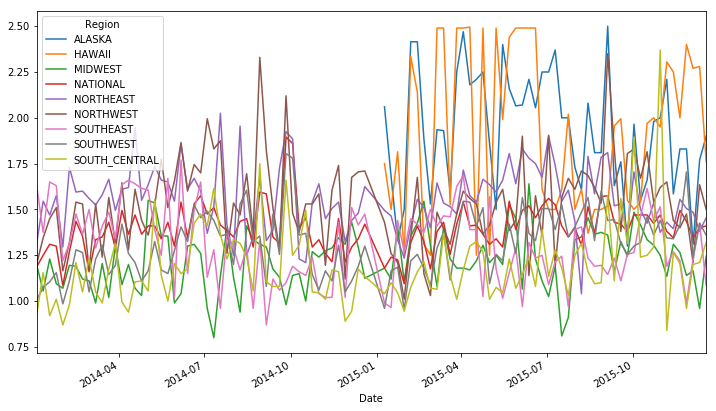

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

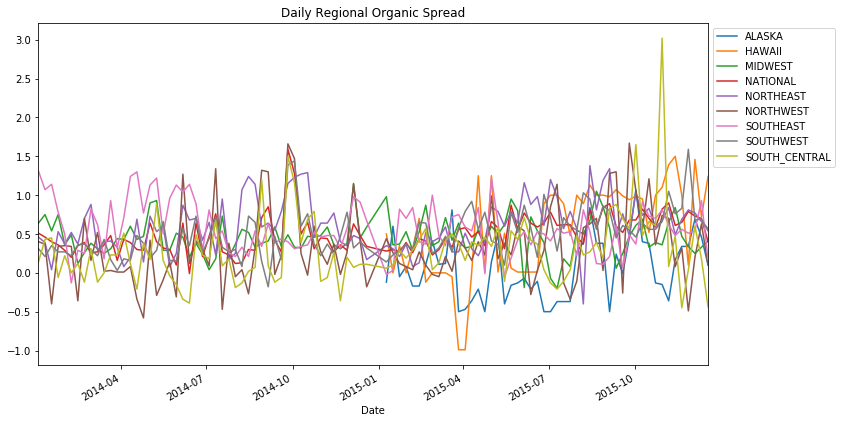

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

# **REAL WORLD DATA**

**My own example k + 20 and analisys**

In [1]:
#Avocado function
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

**My own example k + 22 and analisys**

In [3]:

avocados = read_avocadata('2014', '2016')
avocados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: FutureWarning: The default value of regex will change from True to False in a future version.


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


**My own example k + 23 and analisys**

In [20]:
#Avocado function
"""
Tipos de icfes

"""
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd

icfes = pd.read_csv("https://www.datos.gov.co/resource/rnvb-vnyh.csv")
icfes

,estu_tipodocumento,estu_nacionalidad,estu_genero,estu_fechanacimiento,periodo,estu_consecutivo,estu_estudiante,estu_pais_reside,estu_tieneetnia,estu_depto_reside,...,punt_ingles,percentil_ingles,desemp_ingles,punt_global,percentil_global,estu_inse_individual,estu_nse_individual,estu_nse_establecimiento,estu_estadoinvestigacion,estu_generacion_e
0,TI,SUIZA,F,2003-03-03T00:00:00.000,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,...,55,81,A1,244,49,54.882365,3.0,3.0,PUBLICAR,NO
1,PEP,VENEZUELA,M,2002-05-10T00:00:00.000,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,33,6,A-,238,44,49.252311,2.0,2.0,PUBLICAR,NO
2,TI,VENEZUELA,F,2003-12-14T00:00:00.000,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,59,87,A2,325,94,40.733672,1.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,CE,VENEZUELA,M,2003-04-12T00:00:00.000,20204,SB11202040210971,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,47,58,A-,238,45,48.217953,2.0,3.0,PUBLICAR,NO
4,TI,COLOMBIA,F,2004-03-03T00:00:00.000,20204,SB11202040235382,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,...,43,40,A-,202,19,60.912192,3.0,3.0,PUBLICAR,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NES,VENEZUELA,M,2002-03-08T00:00:00.000,20204,SB11202040548952,ESTUDIANTE,VENEZUELA,No,ANTIOQUIA,...,40,29,A-,192,13,47.672774,2.0,2.0,PUBLICAR,NO
996,CE,VENEZUELA,F,2003-03-07T00:00:00.000,20204,SB11202040426710,ESTUDIANTE,VENEZUELA,No,ANTIOQUIA,...,52,74,A1,242,47,44.680907,2.0,2.0,PUBLICAR,NO
997,CC,VENEZUELA,F,2001-11-05T00:00:00.000,20204,SB11202040107188,ESTUDIANTE,VENEZUELA,No,ANTIOQUIA,...,43,40,A-,242,47,NaN,NaN,3.0,PUBLICAR,NO
998,CE,VENEZUELA,M,2003-10-09T00:00:00.000,20204,SB11202040088122,ESTUDIANTE,VENEZUELA,No,ANTIOQUIA,...,55,81,A1,266,65,66.418307,4.0,3.0,PUBLICAR,NO


In [4]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

**My own example k + 24 and analisys**

In [21]:
icfes.dtypes

estu_tipodocumento           object
estu_nacionalidad            object
estu_genero                  object
estu_fechanacimiento         object
periodo                       int64
                             ...   
estu_inse_individual        float64
estu_nse_individual         float64
estu_nse_establecimiento    float64
estu_estadoinvestigacion     object
estu_generacion_e            object
Length: 81, dtype: object

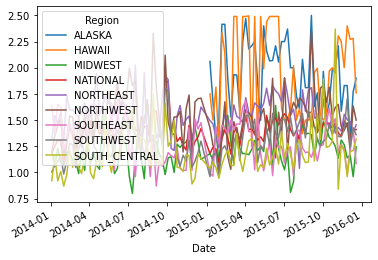

In [22]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

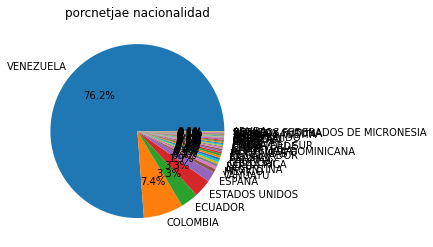

In [26]:
""" Porcentaje por nacionalidaad de icfes """
import matplotlib.pyplot as plt

plt.title('porcnetjae nacionalidad')
ax = icfes['estu_nacionalidad'].value_counts().plot(kind='pie', figsize=(4,4), autopct='%1.1f%%' )
ax.axes.get_yaxis().set_visible(False)

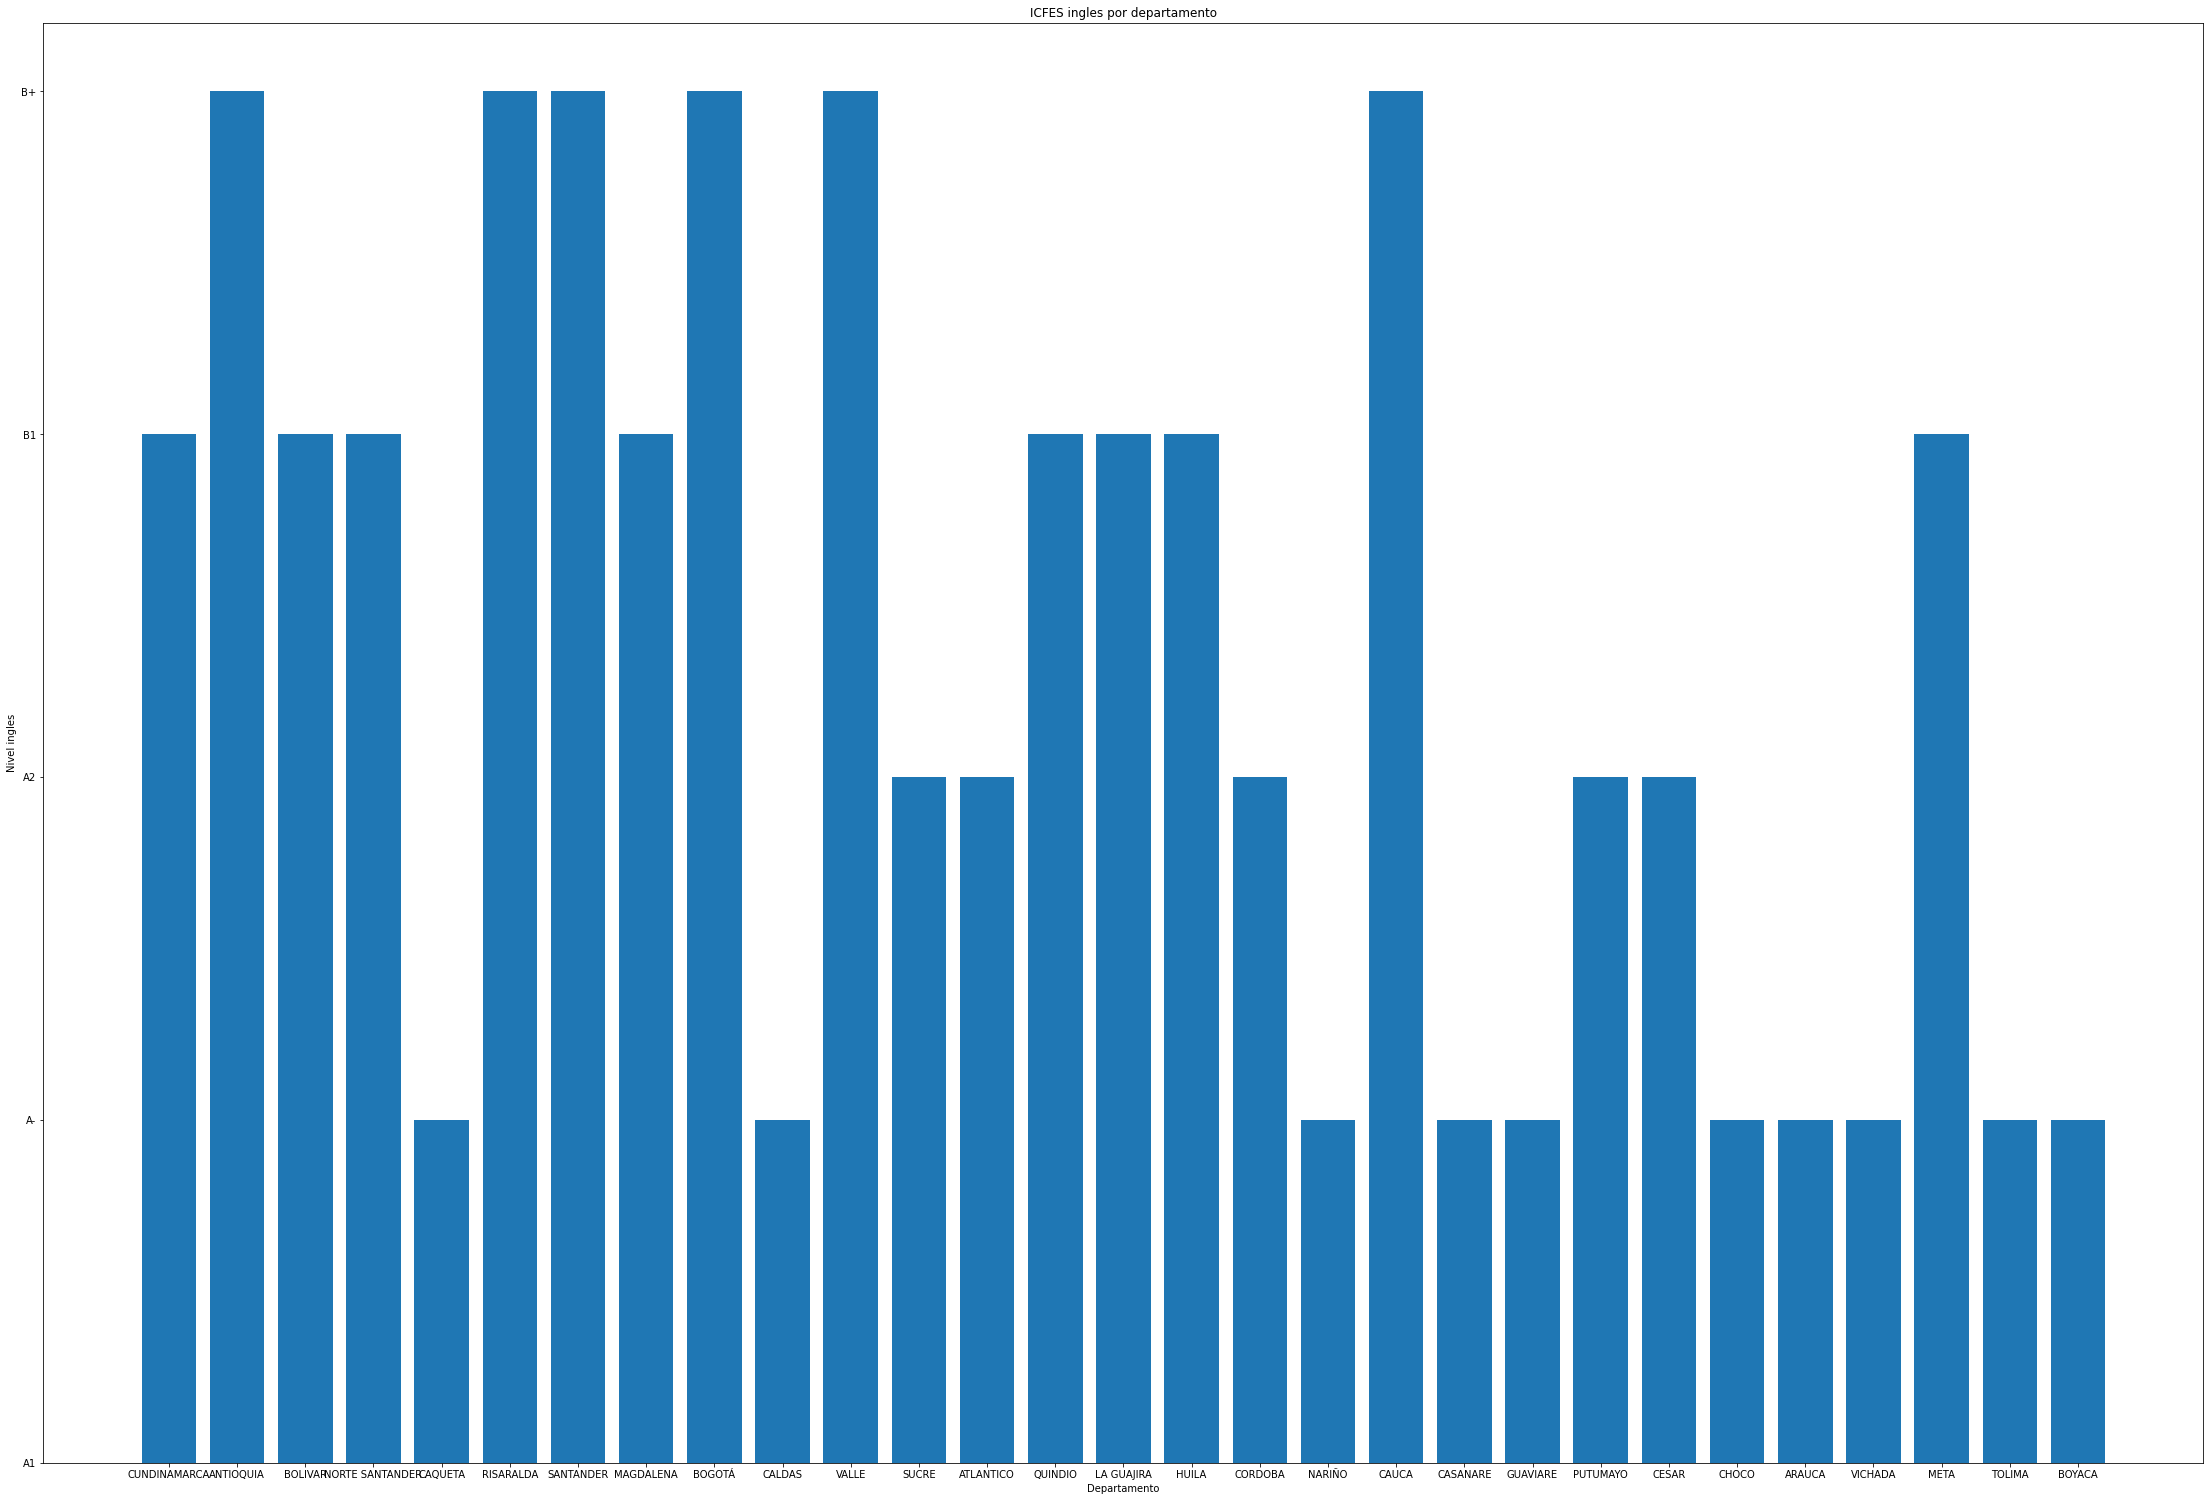

In [29]:
"""ICFES por departamento"""
fig = plt.figure()
ax = fig.add_axes([0,1,5,5])
ax.bar( icfes["estu_depto_reside"],icfes["desemp_ingles"])
plt.title('ICFES ingles por departamento')
ax.set_xlabel("Departamento")
ax.set_ylabel("Nivel ingles")
plt.show()

Text(0.5, 1.0, 'Distribucion de Nivel de Ingles')

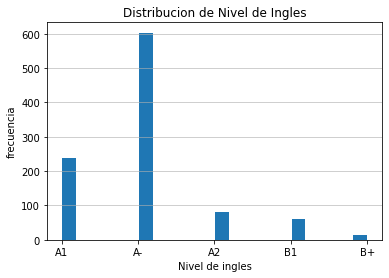

In [31]:
"""Distribucion de Nivel de Ingles"""
plt.hist(x = icfes['desemp_ingles'], bins = 20, rwidth = 0.9)
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('Nivel de ingles')
plt.ylabel('frecuencia')
plt.title('Distribucion de Nivel de Ingles')

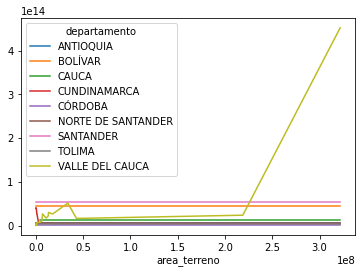

In [11]:
"""Percentil por departamento"""
icfes_f = icfes[icfes.estrato == 'RURAL']
icfes_f.groupby(['percentil', 'departamento'])['precio'].mean().unstack().ffill().plot();

In [12]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

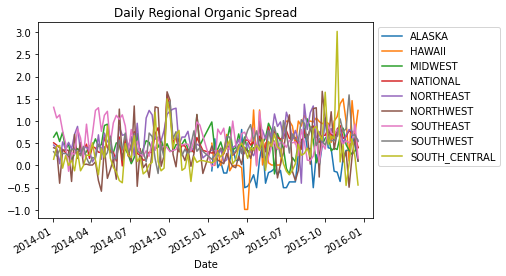

In [13]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [14]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


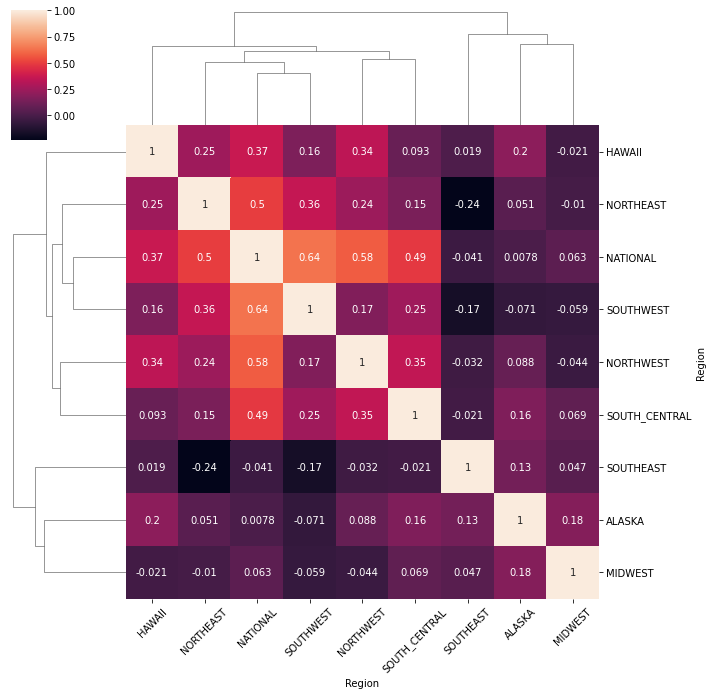

In [15]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!